<a href="https://colab.research.google.com/github/Isidore01/Data-Analytics-Bootcamp/blob/main/Data_sciecne_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

DATA LOADING AND INSPECTION

In [2]:
df=pd.read_csv('//content/drive/MyDrive/Hagital Dataset/lagos_ride_dataset.csv')
df.head()

,ride_id,customer_id,ride_order_timestamp,ride_takeoff_timestamp,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,...,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,customer_occupation,customer_marital_status,payment_method,driver_rating,ride_price_naira
0,RIDE_00008679,CUST_001840,1/1/2024 0:48,1/1/2024 0:56,Oshodi-Isolo,Alimosho,6.538020,3.322390,6.623844,3.307955,...,0,0,False,False,1,Student,Divorced,Wallet,5.0,2319.28
1,RIDE_00012194,CUST_003517,1/1/2024 1:05,1/1/2024 1:14,Badagry,Eti-Osa,6.434274,2.929438,6.401178,3.476332,...,1,0,False,False,1,Trader,Widowed,Card,3.8,4064.56
2,RIDE_00015931,CUST_002723,1/1/2024 1:09,1/1/2024 1:24,Lagos Mainland,Badagry,6.521396,3.342150,6.396760,2.916094,...,1,0,False,False,1,Civil Servant,Widowed,Card,4.6,11490.41
3,RIDE_00006115,CUST_013114,1/1/2024 2:10,1/1/2024 2:19,Lagos Island,Ibeju-Lekki,6.481557,3.425180,6.496539,3.802438,...,2,0,False,False,1,Teacher,Divorced,Bank Transfer,3.8,4242.88
4,RIDE_00025347,CUST_010897,1/1/2024 2:19,1/1/2024 2:34,Eti-Osa,Surulere,6.438681,3.451830,6.542341,3.393765,...,2,0,False,False,1,Banker,Single,Bank Transfer,4.6,1417.05


In [ ]:
df.shape

(37800, 30)

In [ ]:
df.describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance_km,estimated_duration_minutes,passengers_count,precipitation_mm,humidity_percent,hour_of_day,day_of_week,month,driver_rating,ride_price_naira
count,37800.000000,37800.000000,37800.000000,37800.000000,37800.000000,37800.000000,37800.000000,37800.000000,37800.000000,37800.000000,37800.000000,37800.000000,37800.000000,37800.000000
mean,6.521563,3.380130,6.520812,3.379205,28.272578,85.980333,1.741270,4.433286,67.643876,11.471005,2.971958,5.579259,4.252902,4902.453599
std,0.079221,0.222617,0.079662,0.219399,23.528160,76.203090,0.992066,6.784268,13.673026,6.885814,2.001364,3.227203,0.435706,5503.812831
min,6.366705,2.833388,6.366732,2.833338,0.500000,5.000000,1.000000,0.000000,40.000000,0.000000,0.000000,1.000000,3.500000,137.260000
25%,6.457580,3.297105,6.455936,3.297493,10.770000,31.900000,1.000000,0.000000,57.700000,6.000000,1.000000,3.000000,3.900000,1379.662500
50%,6.510921,3.350652,6.508748,3.350683,19.790000,58.400000,1.000000,1.400000,66.500000,11.000000,3.000000,5.000000,4.300000,2892.320000
75%,6.580856,3.411436,6.580199,3.409970,44.265000,118.200000,3.000000,3.000000,78.000000,17.000000,5.000000,8.000000,4.600000,6401.810000
max,6.733278,4.033232,6.733241,4.033283,133.950000,569.900000,4.000000,25.000000,95.000000,23.000000,6.000000,12.000000,5.000000,74410.040000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37800 entries, 0 to 37799
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ride_id                     37800 non-null  object 
 1   customer_id                 37800 non-null  object 
 2   ride_order_timestamp        37800 non-null  object 
 3   ride_takeoff_timestamp      37800 non-null  object 
 4   pickup_location             37800 non-null  object 
 5   dropoff_location            37800 non-null  object 
 6   pickup_latitude             37800 non-null  float64
 7   pickup_longitude            37800 non-null  float64
 8   dropoff_latitude            37800 non-null  float64
 9   dropoff_longitude           37800 non-null  float64
 10  distance_km                 37800 non-null  float64
 11  estimated_duration_minutes  37800 non-null  float64
 12  car_type                    37800 non-null  object 
 13  car_brand                   378

In [ ]:
df.isna().sum()

,0
ride_id,0
customer_id,0
ride_order_timestamp,0
ride_takeoff_timestamp,0
pickup_location,0
dropoff_location,0
pickup_latitude,0
pickup_longitude,0
dropoff_latitude,0
dropoff_longitude,0


In [ ]:
df.tail()

,ride_id,customer_id,ride_order_timestamp,ride_takeoff_timestamp,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,...,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,customer_occupation,customer_marital_status,payment_method,driver_rating,ride_price_naira
37795,RIDE_00016556,CUST_014154,7/30/2025 22:26,7/30/2025 22:35,Shomolu,Badagry,6.502056,3.342208,6.426524,2.869288,...,22,2,False,False,7,Unemployed,Widowed,Bank Transfer,4.6,6390.73
37796,RIDE_00025749,CUST_013315,7/30/2025 22:34,7/30/2025 22:40,Ajeromi-Ifelodun,Kosofe,6.466941,3.348754,6.560563,3.407402,...,22,2,False,False,7,Doctor,Single,Card,4.7,877.43
37797,RIDE_00032022,CUST_014042,7/30/2025 22:58,7/30/2025 23:07,Kosofe,Ajeromi-Ifelodun,6.605528,3.419182,6.458882,3.346888,...,22,2,False,False,7,Student,Divorced,Card,3.8,1601.56
37798,RIDE_00013421,CUST_003184,7/30/2025 23:00,7/30/2025 23:10,Ajeromi-Ifelodun,Ibeju-Lekki,6.418978,3.272524,6.472643,3.899370,...,23,2,False,False,7,Unemployed,Widowed,Card,4.3,14641.64
37799,RIDE_00001408,CUST_005500,7/30/2025 23:17,7/30/2025 23:32,Apapa,Shomolu,6.409419,3.371022,6.500334,3.384656,...,23,2,False,False,7,Banker,Widowed,Card,4.8,1575.54


In [ ]:
df.sample(3)

,ride_id,customer_id,ride_order_timestamp,ride_takeoff_timestamp,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,...,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,customer_occupation,customer_marital_status,payment_method,driver_rating,ride_price_naira
17224,RIDE_00010161,CUST_012697,9/20/2024 3:03,9/20/2024 3:15,Ojo,Ikeja,6.471375,3.111663,6.616579,3.339770,...,3,4,False,False,9,Unemployed,Widowed,Wallet,5.0,2779.31
1925,RIDE_00015628,CUST_002307,1/30/2024 2:34,1/30/2024 2:41,Oshodi-Isolo,Lagos Island,6.564280,3.344372,6.465109,3.371184,...,2,1,False,False,1,Engineer,Single,Wallet,4.3,2001.80
10591,RIDE_00015457,CUST_001328,6/10/2024 16:59,6/10/2024 17:07,Apapa,Kosofe,6.409847,3.392815,6.602480,3.350725,...,16,0,False,False,6,Driver,Divorced,Card,3.9,6068.84


In [ ]:
df.dtypes

,0
ride_id,object
customer_id,object
ride_order_timestamp,object
ride_takeoff_timestamp,object
pickup_location,object
dropoff_location,object
pickup_latitude,float64
pickup_longitude,float64
dropoff_latitude,float64
dropoff_longitude,float64


In [ ]:
df.columns

Index(['ride_id', 'customer_id', 'ride_order_timestamp',
       'ride_takeoff_timestamp', 'pickup_location', 'dropoff_location',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude', 'distance_km', 'estimated_duration_minutes',
       'car_type', 'car_brand', 'car_model', 'passengers_count',
       'weather_type', 'precipitation_mm', 'humidity_percent', 'traffic_type',
       'hour_of_day', 'day_of_week', 'is_weekend', 'is_rush_hour', 'month',
       'customer_occupation', 'customer_marital_status', 'payment_method',
       'driver_rating', 'ride_price_naira'],
      dtype='object')

In [ ]:
print(df.duplicated().sum())

0


DATA EXPLORATION AND ANALYSIS

In [ ]:
df['car_type'].unique()

array(['Executive', 'Economy', 'Premium', 'Comfort'], dtype=object)

In [ ]:
df['car_brand'].unique()

array(['Audi', 'Hyundai', 'Lexus', 'Toyota', 'BMW', 'Mercedes', 'Nissan',
       'Honda'], dtype=object)

In [ ]:
df['car_model'].unique()

array(['A8', 'Elantra', 'ES', 'Camry', '3-Series', 'C-Class', 'A4', 'LS',
       'Altima', 'Civic', 'Corolla', 'Accord', 'Sonata', 'Sentra',
       '7-Series', 'S-Class'], dtype=object)

In [ ]:
df['customer_occupation'].unique()

array(['Student', 'Trader', 'Civil Servant', 'Teacher', 'Banker',
       'Engineer', 'Driver', 'Artist', 'Doctor', 'Lawyer',
       'Business Owner', 'Unemployed'], dtype=object)

In [ ]:
df['weather_type'].unique()

array(['Partly Cloudy', 'Cloudy', 'Rainy', 'Sunny', 'Overcast'],
      dtype=object)

In [ ]:
df['customer_id'].duplicated().sum()

np.int64(23890)

In [ ]:
df.sort_values(by =['customer_id','passengers_count'],ascending=True)

,ride_id,customer_id,ride_order_timestamp,ride_takeoff_timestamp,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,...,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,customer_occupation,customer_marital_status,payment_method,driver_rating,ride_price_naira
29891,RIDE_00010326,CUST_000001,4/1/2025 22:13,4/1/2025 22:25,Ikorodu,Ojo,6.572614,3.547006,6.434629,3.174428,...,22,1,False,False,4,Artist,Single,Card,4.6,4249.27
30423,RIDE_00023305,CUST_000002,4/9/2025 13:33,4/9/2025 13:44,Apapa,Amuwo-Odofin,6.476803,3.395797,6.499398,3.278649,...,13,2,False,False,4,Banker,Single,Wallet,4.7,954.22
20173,RIDE_00014721,CUST_000002,11/4/2024 2:18,11/4/2024 2:25,Ikorodu,Badagry,6.635572,3.493503,6.483219,2.862260,...,2,0,False,False,11,Civil Servant,Widowed,Wallet,4.6,6942.19
34697,RIDE_00015322,CUST_000002,6/12/2025 12:02,6/12/2025 12:09,Lagos Island,Kosofe,6.441729,3.388823,6.530204,3.354754,...,12,3,False,False,6,Doctor,Single,Cash,3.6,814.76
28388,RIDE_00005990,CUST_000003,3/10/2025 4:37,3/10/2025 4:47,Ifako-Ijaiye,Ikeja,6.639910,3.268741,6.600076,3.366195,...,4,0,False,False,3,Teacher,Widowed,Card,4.9,3106.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31869,RIDE_00029715,CUST_015117,5/1/2025 21:34,5/1/2025 21:39,Ojo,Shomolu,6.430269,3.169328,6.491868,3.425957,...,21,3,False,False,5,Driver,Widowed,Card,4.7,3044.88
15814,RIDE_00017023,CUST_015117,8/29/2024 14:28,8/29/2024 14:33,Kosofe,Agege,6.580043,3.344019,6.622640,3.360385,...,14,3,False,False,8,Teacher,Widowed,Cash,3.8,560.46
29320,RIDE_00027498,CUST_015118,3/24/2025 6:25,3/24/2025 6:32,Shomolu,Agege,6.516152,3.357796,6.664301,3.326348,...,6,0,False,False,3,Teacher,Widowed,Card,4.8,4889.53
35037,RIDE_00027695,CUST_015118,6/17/2025 12:54,6/17/2025 13:06,Lagos Island,Alimosho,6.400993,3.419514,6.635917,3.240857,...,12,1,False,False,6,Artist,Divorced,Wallet,4.0,3156.40


In [ ]:
print(df['estimated_duration_minutes'].mean())

85.98033333333332


In [ ]:
print(df['estimated_duration_minutes'].median())

58.4


In [ ]:
print(df['customer_id'].mode())

0    CUST_001383
1    CUST_003602
Name: customer_id, dtype: object


In [ ]:
print(df['customer_occupation'].mode())

0    Lawyer
Name: customer_occupation, dtype: object


In [ ]:
df['customer_occupation'].value_counts()

,count
customer_occupation,
Lawyer,3216
Driver,3215
Civil Servant,3190
Banker,3155
Student,3154
Artist,3153
Trader,3151
Unemployed,3150
Engineer,3139


In [ ]:
df['car_brand'].value_counts()

,count
car_brand,
Toyota,6085
Hyundai,6024
Nissan,6006
Honda,5863
Audi,3487
Lexus,3463
BMW,3454
Mercedes,3418


In [ ]:
df['customer_occupation'].value_counts(normalize=True)*100

,proportion
customer_occupation,
Lawyer,8.507937
Driver,8.505291
Civil Servant,8.439153
Banker,8.346561
Student,8.343915
Artist,8.341270
Trader,8.335979
Unemployed,8.333333
Engineer,8.304233


In [ ]:
df['weather_type'].value_counts()

,count
weather_type,
Sunny,10588
Cloudy,10084
Rainy,9404
Partly Cloudy,5809
Overcast,1915


In [ ]:
#GROUPBY

In [ ]:
monthly_revenue = df.groupby('month')['ride_price_naira'].sum()
highest_revenue_month = monthly_revenue.idxmax()
highest_revenue_amount = monthly_revenue.max()
print(f"The month with the highest revenue is {highest_revenue_month} with a total revenue of {highest_revenue_amount:.2f} Naira.")
display(monthly_revenue)

The month with the highest revenue is 5 with a total revenue of 20727638.52 Naira.


,ride_price_naira
month,
1,19471218.69
2,16326111.27
3,20163455.94
4,19681011.84
5,20727638.52
6,19408316.74
7,19812446.68
8,9854589.00
9,9866511.17


In [ ]:
rides_per_hour = df.groupby('hour_of_day')['ride_id'].count()

most_popular_hour = rides_per_hour.idxmax()
highest_ride_count = rides_per_hour.max()

print(f"The hour of the day with the most rides is Hour {most_popular_hour} with a total of {highest_ride_count} rides.")
display(rides_per_hour)

The hour of the day with the most rides is Hour 17 with a total of 1703 rides.


,ride_id
hour_of_day,
0,1618
1,1537
2,1577
3,1568
4,1561
5,1525
6,1553
7,1606
8,1636


In [ ]:
rides_by_day_type = df.groupby('is_weekend')['ride_id'].count()

print("Number of rides on weekdays and weekends:")
display(rides_by_day_type)

if rides_by_day_type[False] > rides_by_day_type[True]:
    print("\nPeople ride more on weekdays.")
elif rides_by_day_type[False] < rides_by_day_type[True]:
    print("\nPeople ride more on weekends.")
else:
    print("\nThe number of rides is the same on weekdays and weekends.")

Number of rides on weekdays and weekends:


,ride_id
is_weekend,
False,27159
True,10641



People ride more on weekdays.


In [ ]:
df.groupby('car_type')['customer_occupation'].value_counts()

car_type   customer_occupation
Comfort    Artist                 1124
           Civil Servant          1114
           Driver                 1114
           Student                1110
           Engineer               1104
           Lawyer                 1104
           Unemployed             1076
           Teacher                1073
           Trader                 1071
           Banker                 1067
           Doctor                 1034
           Business Owner         1009
Economy    Lawyer                  969
           Trader                  935
           Unemployed              930
           Driver                  926
           Doctor                  921
           Banker                  918
           Engineer                918
           Artist                  917
           Civil Servant           900
           Student                 900
           Business Owner          890
           Teacher                 854
Executive  Driver                  321
           Doctor                  315
           Business Owner          314
           Student                 314
           Unemployed              308
           Artist                  305
           Civil Servant           302
           Teacher                 302
           Lawyer                  293
           Banker                  292
           Engineer                291
           Trader                  276
Premium    Teacher                 895
           Banker                  878
           Civil Servant           874
           Trader                  869
           Driver                  854
           Lawyer                  850
           Doctor                  836
           Unemployed              836
           Business Owner          834
           Student                 830
           Engineer                826
           Artist                  807
Name: count, dtype: int64

In [ ]:
#Average ride price based on weather type
df.groupby('weather_type')['ride_price_naira'].mean().reset_index()

,weather_type,ride_price_naira
0,Cloudy,4529.452698
1,Overcast,4396.090183
2,Partly Cloudy,4584.624603
3,Rainy,6013.047382
4,Sunny,4537.254481


In [ ]:
#average revenue per trip
average_revenue_per_trip = df['ride_price_naira'].mean()
print(f"Average Revenue per Trip: {average_revenue_per_trip:.2f} Naira")



Average Revenue per Trip: 4902.45 Naira


In [ ]:
#average revenue per day of the week
average_revenue_per_day = df.groupby('day_of_week')['ride_price_naira'].mean()
print("\nAverage Revenue per Day of the Week:")
display(average_revenue_per_day)




Average Revenue per Day of the Week:


,ride_price_naira
day_of_week,
0,4827.836073
1,4914.804995
2,4792.079427
3,4986.493031
4,4848.916398
5,4958.900214
6,4995.609589


In [ ]:
#average revenue per hour of the day
average_revenue_per_hour = df.groupby('hour_of_day')['ride_price_naira'].mean()
print("\nAverage Revenue per Hour of the Day:")
display(average_revenue_per_hour)


Average Revenue per Hour of the Day:


,ride_price_naira
hour_of_day,
0,4359.982868
1,4232.813435
2,4123.575111
3,4114.801964
4,4083.218757
5,4262.872315
6,4125.216909
7,7020.248182
8,7081.215532


In [ ]:
df.corr(numeric_only=True)

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance_km,estimated_duration_minutes,passengers_count,precipitation_mm,humidity_percent,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,driver_rating,ride_price_naira
pickup_latitude,1.000000,0.121681,0.002905,-0.002665,-0.059527,-0.057573,0.009129,0.009383,0.010805,0.003226,-0.002007,-0.003491,-0.008859,-0.007064,-0.001209,-0.049124
pickup_longitude,0.121681,1.000000,-0.009847,-0.004133,0.234698,0.209364,0.000162,-0.002474,-0.005003,-0.001483,-0.001185,0.003399,-0.006577,-0.010296,0.001295,0.170146
dropoff_latitude,0.002905,-0.009847,1.000000,0.100796,-0.062470,-0.060192,0.007492,-0.003234,-0.009926,-0.001181,-0.001357,0.000530,-0.004159,-0.004142,-0.004926,-0.055671
dropoff_longitude,-0.002665,-0.004133,0.100796,1.000000,0.224514,0.204952,-0.002942,-0.005191,-0.007823,0.006581,0.010928,0.010092,0.000949,0.003590,-0.001932,0.172844
distance_km,-0.059527,0.234698,-0.062470,0.224514,1.000000,0.912447,-0.000239,-0.008426,-0.008657,-0.006815,0.008188,0.006599,-0.000054,0.004763,0.004896,0.767743
estimated_duration_minutes,-0.057573,0.209364,-0.060192,0.204952,0.912447,1.000000,-0.003917,0.028635,0.021987,0.007838,0.007985,0.007329,0.111745,0.008893,0.006079,0.818497
passengers_count,0.009129,0.000162,0.007492,-0.002942,-0.000239,-0.003917,1.000000,-0.009319,-0.009828,-0.002024,0.003701,0.002914,-0.002687,0.003009,-0.005448,-0.004585
precipitation_mm,0.009383,-0.002474,-0.003234,-0.005191,-0.008426,0.028635,-0.009319,1.000000,0.699355,-0.015165,-0.001222,-0.003345,-0.008169,0.086398,-0.000167,0.103470
humidity_percent,0.010805,-0.005003,-0.009926,-0.007823,-0.008657,0.021987,-0.009828,0.699355,1.000000,-0.005424,0.001311,-0.003974,-0.005406,0.087330,-0.000655,0.084312
hour_of_day,0.003226,-0.001483,-0.001181,0.006581,-0.006815,0.007838,-0.002024,-0.015165,-0.005424,1.000000,-0.000034,0.002606,0.128596,-0.006280,-0.000493,0.024962


In [ ]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance_km,estimated_duration_minutes,passengers_count,precipitation_mm,humidity_percent,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,driver_rating,ride_price_naira
pickup_latitude,1.000000,0.121681,0.002905,-0.002665,-0.059527,-0.057573,0.009129,0.009383,0.010805,0.003226,-0.002007,-0.003491,-0.008859,-0.007064,-0.001209,-0.049124
pickup_longitude,0.121681,1.000000,-0.009847,-0.004133,0.234698,0.209364,0.000162,-0.002474,-0.005003,-0.001483,-0.001185,0.003399,-0.006577,-0.010296,0.001295,0.170146
dropoff_latitude,0.002905,-0.009847,1.000000,0.100796,-0.062470,-0.060192,0.007492,-0.003234,-0.009926,-0.001181,-0.001357,0.000530,-0.004159,-0.004142,-0.004926,-0.055671
dropoff_longitude,-0.002665,-0.004133,0.100796,1.000000,0.224514,0.204952,-0.002942,-0.005191,-0.007823,0.006581,0.010928,0.010092,0.000949,0.003590,-0.001932,0.172844
distance_km,-0.059527,0.234698,-0.062470,0.224514,1.000000,0.912447,-0.000239,-0.008426,-0.008657,-0.006815,0.008188,0.006599,-0.000054,0.004763,0.004896,0.767743
estimated_duration_minutes,-0.057573,0.209364,-0.060192,0.204952,0.912447,1.000000,-0.003917,0.028635,0.021987,0.007838,0.007985,0.007329,0.111745,0.008893,0.006079,0.818497
passengers_count,0.009129,0.000162,0.007492,-0.002942,-0.000239,-0.003917,1.000000,-0.009319,-0.009828,-0.002024,0.003701,0.002914,-0.002687,0.003009,-0.005448,-0.004585
precipitation_mm,0.009383,-0.002474,-0.003234,-0.005191,-0.008426,0.028635,-0.009319,1.000000,0.699355,-0.015165,-0.001222,-0.003345,-0.008169,0.086398,-0.000167,0.103470
humidity_percent,0.010805,-0.005003,-0.009926,-0.007823,-0.008657,0.021987,-0.009828,0.699355,1.000000,-0.005424,0.001311,-0.003974,-0.005406,0.087330,-0.000655,0.084312
hour_of_day,0.003226,-0.001483,-0.001181,0.006581,-0.006815,0.007838,-0.002024,-0.015165,-0.005424,1.000000,-0.000034,0.002606,0.128596,-0.006280,-0.000493,0.024962


In [ ]:
#maximum ride price
df['ride_price_naira'].max()

74410.04

In [ ]:
#minimun ride price
df['ride_price_naira'].min()

137.26

In [ ]:
df['dropoff_location'].value_counts().nlargest(1)

,count
dropoff_location,
Shomolu,1979


In [ ]:
df['dropoff_location'].value_counts().nsmallest(1)

,count
dropoff_location,
Epe,1753


In [ ]:
df['pickup_location'].value_counts().nlargest(3)

,count
pickup_location,
Badagry,2005
Kosofe,1971
Lagos Mainland,1949


In [ ]:
df['pickup_location'].value_counts().nsmallest(3)

,count
pickup_location,
Ikeja,1786
Alimosho,1799
Apapa,1814


In [ ]:
#Masking
df[(df['ride_price_naira'] >10000 ) & (df['customer_occupation'] == 'Student') & (df['customer_marital_status'] == 'Single')]

,ride_id,customer_id,ride_order_timestamp,ride_takeoff_timestamp,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,...,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,customer_occupation,customer_marital_status,payment_method,driver_rating,ride_price_naira
1055,RIDE_00028980,CUST_007057,1/17/2024 6:12,1/17/2024 6:21,Badagry,Ikorodu,6.439195,2.856207,6.578637,3.533803,...,6,2,False,False,1,Student,Single,Bank Transfer,4.8,12835.46
1090,RIDE_00037541,CUST_014906,1/17/2024 19:22,1/17/2024 19:31,Badagry,Ifako-Ijaiye,6.457409,2.883166,6.713708,3.217626,...,19,2,False,True,1,Student,Single,Wallet,3.8,14581.86
2778,RIDE_00028025,CUST_010458,2/12/2024 8:47,2/12/2024 8:56,Ikorodu,Badagry,6.657265,3.496020,6.434425,2.879131,...,8,0,False,True,2,Student,Single,Wallet,4.0,25157.07
3443,RIDE_00001826,CUST_012446,2/22/2024 9:31,2/22/2024 9:36,Ifako-Ijaiye,Apapa,6.719111,3.294652,6.459300,3.342744,...,9,3,False,True,2,Student,Single,Card,4.3,16093.45
4370,RIDE_00011504,CUST_001791,3/7/2024 18:22,3/7/2024 18:29,Epe,Agege,6.557698,3.991730,6.569843,3.345169,...,18,3,False,True,3,Student,Single,Cash,4.2,33871.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36611,RIDE_00003074,CUST_008144,7/11/2025 18:53,7/11/2025 19:05,Epe,Apapa,6.577825,3.972613,6.415936,3.369275,...,18,4,False,True,7,Student,Single,Cash,3.6,21625.47
37038,RIDE_00024052,CUST_012562,7/18/2025 14:22,7/18/2025 14:34,Ajeromi-Ifelodun,Ifako-Ijaiye,6.436865,3.350984,6.719053,3.304112,...,14,4,False,False,7,Student,Single,Cash,4.8,10138.87
37308,RIDE_00010199,CUST_013326,7/23/2025 7:59,7/23/2025 8:05,Ibeju-Lekki,Oshodi-Isolo,6.464606,3.896833,6.537458,3.348027,...,7,2,False,True,7,Student,Single,Bank Transfer,4.6,20460.55
37646,RIDE_00020741,CUST_000462,7/28/2025 13:46,7/28/2025 13:57,Ibeju-Lekki,Kosofe,6.455232,3.889169,6.580292,3.425463,...,13,0,False,False,7,Student,Single,Wallet,3.6,12543.73


In [ ]:
df[~(df['ride_price_naira'] >10000 ) & (df['customer_occupation'] == 'Student') & (df['customer_marital_status'] == 'Single')]

,ride_id,customer_id,ride_order_timestamp,ride_takeoff_timestamp,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,...,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,customer_occupation,customer_marital_status,payment_method,driver_rating,ride_price_naira
10,RIDE_00025594,CUST_001160,1/1/2024 3:43,1/1/2024 3:56,Ifako-Ijaiye,Ajeromi-Ifelodun,6.649252,3.237589,6.427746,3.306345,...,3,0,False,False,1,Student,Single,Cash,4.6,4562.61
13,RIDE_00036586,CUST_007538,1/1/2024 5:40,1/1/2024 5:54,Alimosho,Lagos Mainland,6.602260,3.285258,6.535762,3.400762,...,5,0,False,False,1,Student,Single,Card,4.4,1042.13
94,RIDE_00003632,CUST_003575,1/2/2024 12:50,1/2/2024 13:02,Apapa,Amuwo-Odofin,6.493483,3.390195,6.448564,3.288759,...,12,1,False,False,1,Student,Single,Bank Transfer,4.6,2910.75
110,RIDE_00026726,CUST_011665,1/2/2024 18:41,1/2/2024 18:54,Lagos Mainland,Ajeromi-Ifelodun,6.541058,3.407993,6.423293,3.293299,...,18,1,False,True,1,Student,Single,Wallet,4.8,1808.06
227,RIDE_00037350,CUST_013154,1/4/2024 15:58,1/4/2024 16:10,Ojo,Oshodi-Isolo,6.429601,3.127637,6.494460,3.351651,...,15,3,False,False,1,Student,Single,Wallet,4.6,4911.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37640,RIDE_00000120,CUST_001168,7/28/2025 11:01,7/28/2025 11:13,Lagos Mainland,Badagry,6.523277,3.364418,6.397296,2.887955,...,11,0,False,False,7,Student,Single,Card,4.9,7943.25
37651,RIDE_00030061,CUST_004458,7/28/2025 17:36,7/28/2025 17:46,Shomolu,Kosofe,6.538582,3.417349,6.524158,3.428330,...,17,0,False,True,7,Student,Single,Card,3.9,548.71
37703,RIDE_00017160,CUST_006462,7/29/2025 10:28,7/29/2025 10:37,Ikeja,Apapa,6.552617,3.370777,6.478317,3.344921,...,10,1,False,False,7,Student,Single,Cash,3.7,829.72
37719,RIDE_00019823,CUST_009699,7/29/2025 15:28,7/29/2025 15:34,Ajeromi-Ifelodun,Eti-Osa,6.456747,3.292407,6.408181,3.470640,...,15,1,False,False,7,Student,Single,Wallet,4.4,1400.97


In [ ]:
df[df['month'] == 5]

,ride_id,customer_id,ride_order_timestamp,ride_takeoff_timestamp,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,...,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,customer_occupation,customer_marital_status,payment_method,driver_rating,ride_price_naira
7937,RIDE_00020378,CUST_009257,5/1/2024 0:08,5/1/2024 0:23,Lagos Island,Alimosho,6.413332,3.396679,6.622334,3.262303,...,0,2,False,False,5,Engineer,Single,Wallet,3.5,8009.80
7938,RIDE_00037644,CUST_003562,5/1/2024 0:31,5/1/2024 0:38,Shomolu,Lagos Mainland,6.538214,3.339242,6.535960,3.329300,...,0,2,False,False,5,Teacher,Single,Cash,3.7,313.53
7939,RIDE_00020731,CUST_009638,5/1/2024 0:34,5/1/2024 0:40,Ajeromi-Ifelodun,Ikorodu,6.426476,3.295350,6.581237,3.546375,...,0,2,False,False,5,Student,Divorced,Card,4.6,2309.19
7940,RIDE_00024916,CUST_007548,5/1/2024 0:36,5/1/2024 0:51,Apapa,Ajeromi-Ifelodun,6.478570,3.320518,6.434885,3.316721,...,0,2,False,False,5,Engineer,Married,Bank Transfer,3.6,633.33
7941,RIDE_00028466,CUST_001200,5/1/2024 1:46,5/1/2024 2:00,Agege,Lagos Mainland,6.650387,3.330046,6.485764,3.348984,...,1,2,False,False,5,Driver,Divorced,Wallet,3.9,4378.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,RIDE_00018188,CUST_006476,5/31/2025 22:30,5/31/2025 22:41,Badagry,Lagos Island,6.477159,2.917695,6.461679,3.430082,...,22,5,True,False,5,Teacher,Married,Wallet,3.6,8293.91
33936,RIDE_00022965,CUST_002691,5/31/2025 22:48,5/31/2025 22:57,Surulere,Oshodi-Isolo,6.451288,3.395343,6.484835,3.312972,...,22,5,True,False,5,Lawyer,Widowed,Card,3.6,1224.43
33937,RIDE_00023954,CUST_008740,5/31/2025 23:11,5/31/2025 23:18,Lagos Mainland,Lagos Mainland,6.521927,3.417863,6.460051,3.400588,...,23,5,True,False,5,Driver,Single,Card,3.7,1249.30
33938,RIDE_00005087,CUST_005306,5/31/2025 23:16,5/31/2025 23:31,Ikorodu,Ajeromi-Ifelodun,6.639693,3.473452,6.488932,3.308889,...,23,5,True,False,5,Teacher,Widowed,Wallet,4.5,8955.42


In [ ]:
customer_ride_counts = df['customer_id'].value_counts()

highest_ride_customer = customer_ride_counts.idxmax()
highest_ride_count = customer_ride_counts.max()

print(f"The customer with the highest number of rides is {highest_ride_customer} with a total of {highest_ride_count} rides.")

The customer with the highest number of rides is CUST_003602 with a total of 10 rides.


In [ ]:
#isin
df[df['customer_id'].isin(['CUST_003602','CUST_001383'])]

,ride_id,customer_id,ride_order_timestamp,ride_takeoff_timestamp,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,...,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,customer_occupation,customer_marital_status,payment_method,driver_rating,ride_price_naira
1362,RIDE_00027337,CUST_003602,1/22/2024 6:01,1/22/2024 6:09,Lagos Mainland,Ibeju-Lekki,6.540523,3.373426,6.484718,3.863695,...,6,0,False,False,1,Business Owner,Widowed,Wallet,4.5,3522.15
4413,RIDE_00015839,CUST_003602,3/8/2024 11:55,3/8/2024 12:02,Oshodi-Isolo,Surulere,6.528273,3.328858,6.474567,3.331457,...,11,4,False,False,3,Student,Married,Bank Transfer,4.7,832.42
5077,RIDE_00025512,CUST_003602,3/18/2024 7:26,3/18/2024 7:34,Amuwo-Odofin,Lagos Mainland,6.425142,3.246182,6.537245,3.423439,...,7,0,False,True,3,Lawyer,Divorced,Wallet,4.8,3085.78
6208,RIDE_00023388,CUST_003602,4/4/2024 9:28,4/4/2024 9:39,Oshodi-Isolo,Ojo,6.529521,3.321555,6.447077,3.143297,...,9,3,False,True,4,Artist,Divorced,Card,3.7,4937.51
10356,RIDE_00008464,CUST_003602,6/7/2024 1:35,6/7/2024 1:47,Mushin,Oshodi-Isolo,6.499862,3.315588,6.578354,3.336933,...,1,4,False,False,6,Civil Servant,Single,Cash,4.0,631.82
12279,RIDE_00013074,CUST_003602,7/7/2024 0:21,7/7/2024 0:36,Ifako-Ijaiye,Ibeju-Lekki,6.663870,3.242588,6.492277,3.833980,...,0,6,True,False,7,Artist,Divorced,Cash,4.6,6296.16
12515,RIDE_00022921,CUST_001383,7/10/2024 17:13,7/10/2024 17:23,Ibeju-Lekki,Shomolu,6.484638,3.869741,6.554682,3.356989,...,17,2,False,True,7,Civil Servant,Single,Wallet,4.1,14715.71
15371,RIDE_00014190,CUST_003602,8/22/2024 23:04,8/22/2024 23:10,Apapa,Lagos Island,6.478619,3.361515,6.494103,3.414103,...,23,3,False,False,8,Civil Servant,Divorced,Wallet,4.3,996.21
16937,RIDE_00022703,CUST_003602,9/15/2024 9:53,9/15/2024 10:03,Amuwo-Odofin,Agege,6.429635,3.282983,6.636016,3.350516,...,9,6,True,True,9,Driver,Single,Cash,4.6,2979.68
17650,RIDE_00025781,CUST_001383,9/26/2024 19:30,9/26/2024 19:35,Ifako-Ijaiye,Lagos Island,6.647485,3.241665,6.441935,3.435137,...,19,3,False,True,9,Unemployed,Married,Wallet,3.9,7709.42


In [ ]:
#query
df.query('ride_id == "RIDE_00027337" or ride_id == "RIDE_00015839"')

,ride_id,customer_id,ride_order_timestamp,ride_takeoff_timestamp,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,...,hour_of_day,day_of_week,is_weekend,is_rush_hour,month,customer_occupation,customer_marital_status,payment_method,driver_rating,ride_price_naira
1362,RIDE_00027337,CUST_003602,1/22/2024 6:01,1/22/2024 6:09,Lagos Mainland,Ibeju-Lekki,6.540523,3.373426,6.484718,3.863695,...,6,0,False,False,1,Business Owner,Widowed,Wallet,4.5,3522.15
4413,RIDE_00015839,CUST_003602,3/8/2024 11:55,3/8/2024 12:02,Oshodi-Isolo,Surulere,6.528273,3.328858,6.474567,3.331457,...,11,4,False,False,3,Student,Married,Bank Transfer,4.7,832.42


In [ ]:
#iloc
# loc

In [ ]:
df.iloc[1:30,[0,1,4,5,]]

,ride_id,customer_id,pickup_location,dropoff_location
1,RIDE_00012194,CUST_003517,Badagry,Eti-Osa
2,RIDE_00015931,CUST_002723,Lagos Mainland,Badagry
3,RIDE_00006115,CUST_013114,Lagos Island,Ibeju-Lekki
4,RIDE_00025347,CUST_010897,Eti-Osa,Surulere
5,RIDE_00018432,CUST_000721,Agege,Agege
6,RIDE_00020577,CUST_014128,Mushin,Oshodi-Isolo
7,RIDE_00021519,CUST_005695,Eti-Osa,Oshodi-Isolo
8,RIDE_00009887,CUST_008432,Badagry,Mushin
9,RIDE_00035940,CUST_009767,Epe,Badagry
10,RIDE_00025594,CUST_001160,Ifako-Ijaiye,Ajeromi-Ifelodun


Text(0, 0.5, 'Frequency')

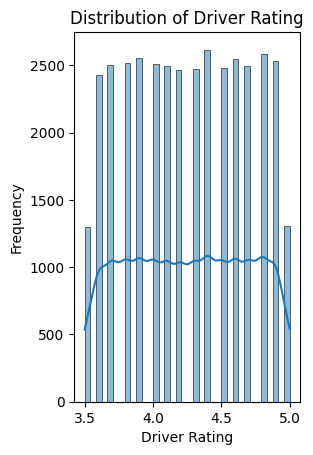

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic statistical analysis of numerical columns

plt.subplot(1, 2, 1)
sns.histplot(df['driver_rating'], kde=True)
plt.title('Distribution of Driver Rating')
plt.xlabel('Driver Rating')
plt.ylabel('Frequency')

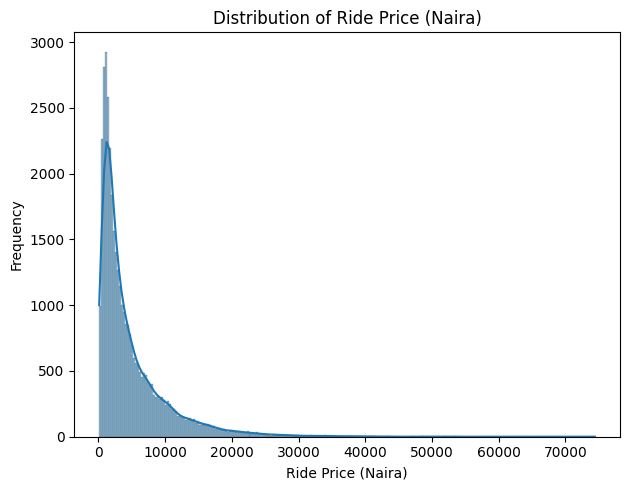

In [ ]:
# 2. Histograms for numerical columns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(df['ride_price_naira'], kde=True)
plt.title('Distribution of Ride Price (Naira)')
plt.xlabel('Ride Price (Naira)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

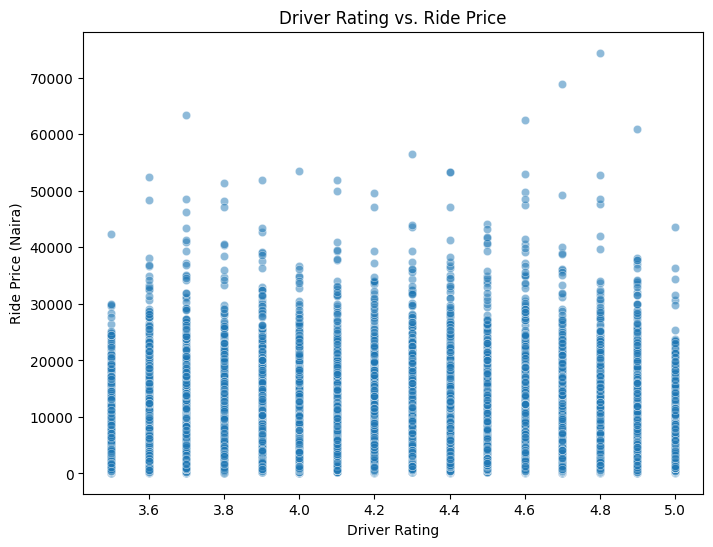

In [ ]:
# 3. Scatter plot to visualize the relationship between driver_rating and ride_price_naira
plt.figure(figsize=(8, 6))
sns.scatterplot(x='driver_rating', y='ride_price_naira', data=df, alpha=0.5)
plt.title('Driver Rating vs. Ride Price')
plt.xlabel('Driver Rating')
plt.ylabel('Ride Price (Naira)')
plt.show()

Analyze the relationship between the extracted time-based features and ride_price_naira using visualizations.



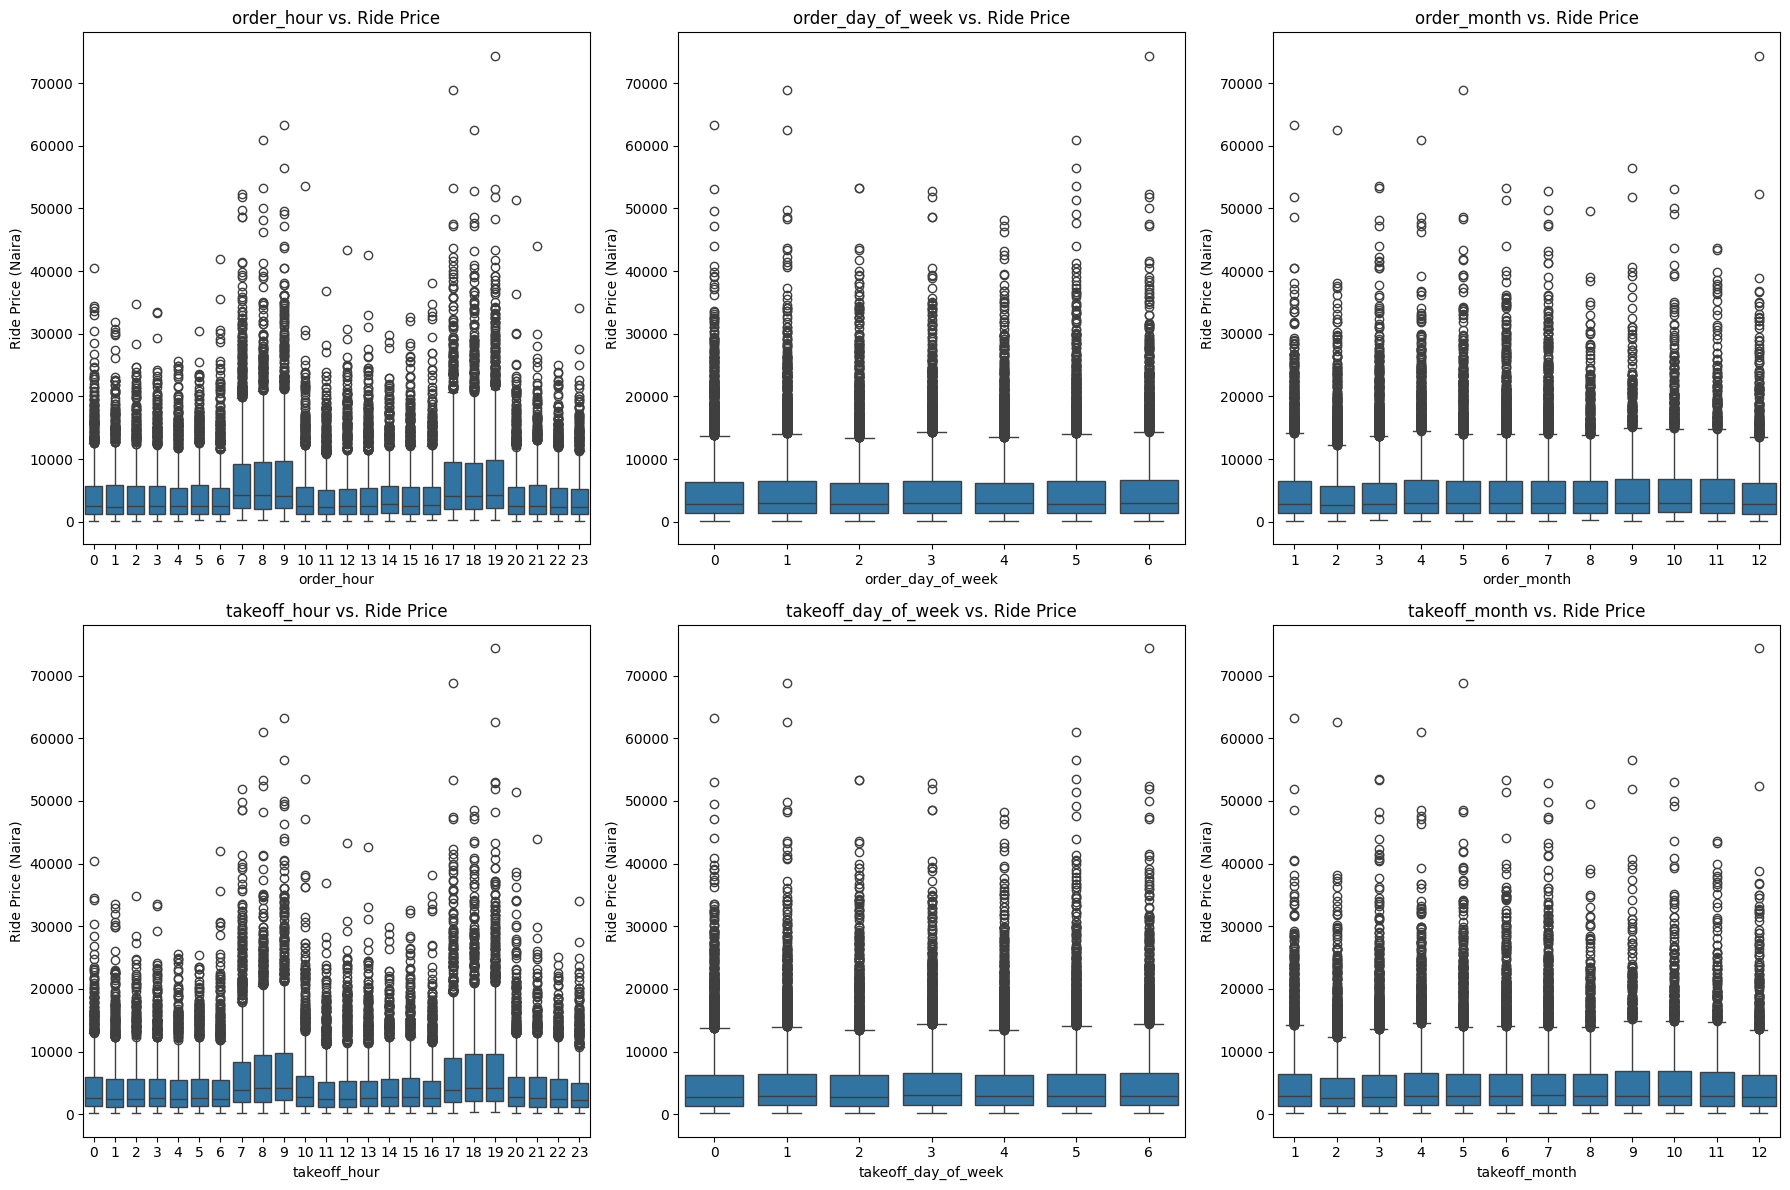

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract time-based features
df['ride_order_timestamp'] = pd.to_datetime(df['ride_order_timestamp'])
df['ride_takeoff_timestamp'] = pd.to_datetime(df['ride_takeoff_timestamp'])

df['order_hour'] = df['ride_order_timestamp'].dt.hour
df['order_day_of_week'] = df['ride_order_timestamp'].dt.dayofweek
df['order_month'] = df['ride_order_timestamp'].dt.month
df['takeoff_hour'] = df['ride_takeoff_timestamp'].dt.hour
df['takeoff_day_of_week'] = df['ride_takeoff_timestamp'].dt.dayofweek
df['takeoff_month'] = df['ride_takeoff_timestamp'].dt.month


# Analyze relationship between time-based features and ride_price_naira
time_features = ['order_hour', 'order_day_of_week', 'order_month', 'takeoff_hour', 'takeoff_day_of_week', 'takeoff_month']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(time_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=feature, y='ride_price_naira', data=df)
    plt.title(f'{feature} vs. Ride Price')
    plt.xlabel(feature)
    plt.ylabel('Ride Price (Naira)')

plt.tight_layout()
plt.show()

Analyze the relationship between categorical features and ride_price_naira using visualizations.

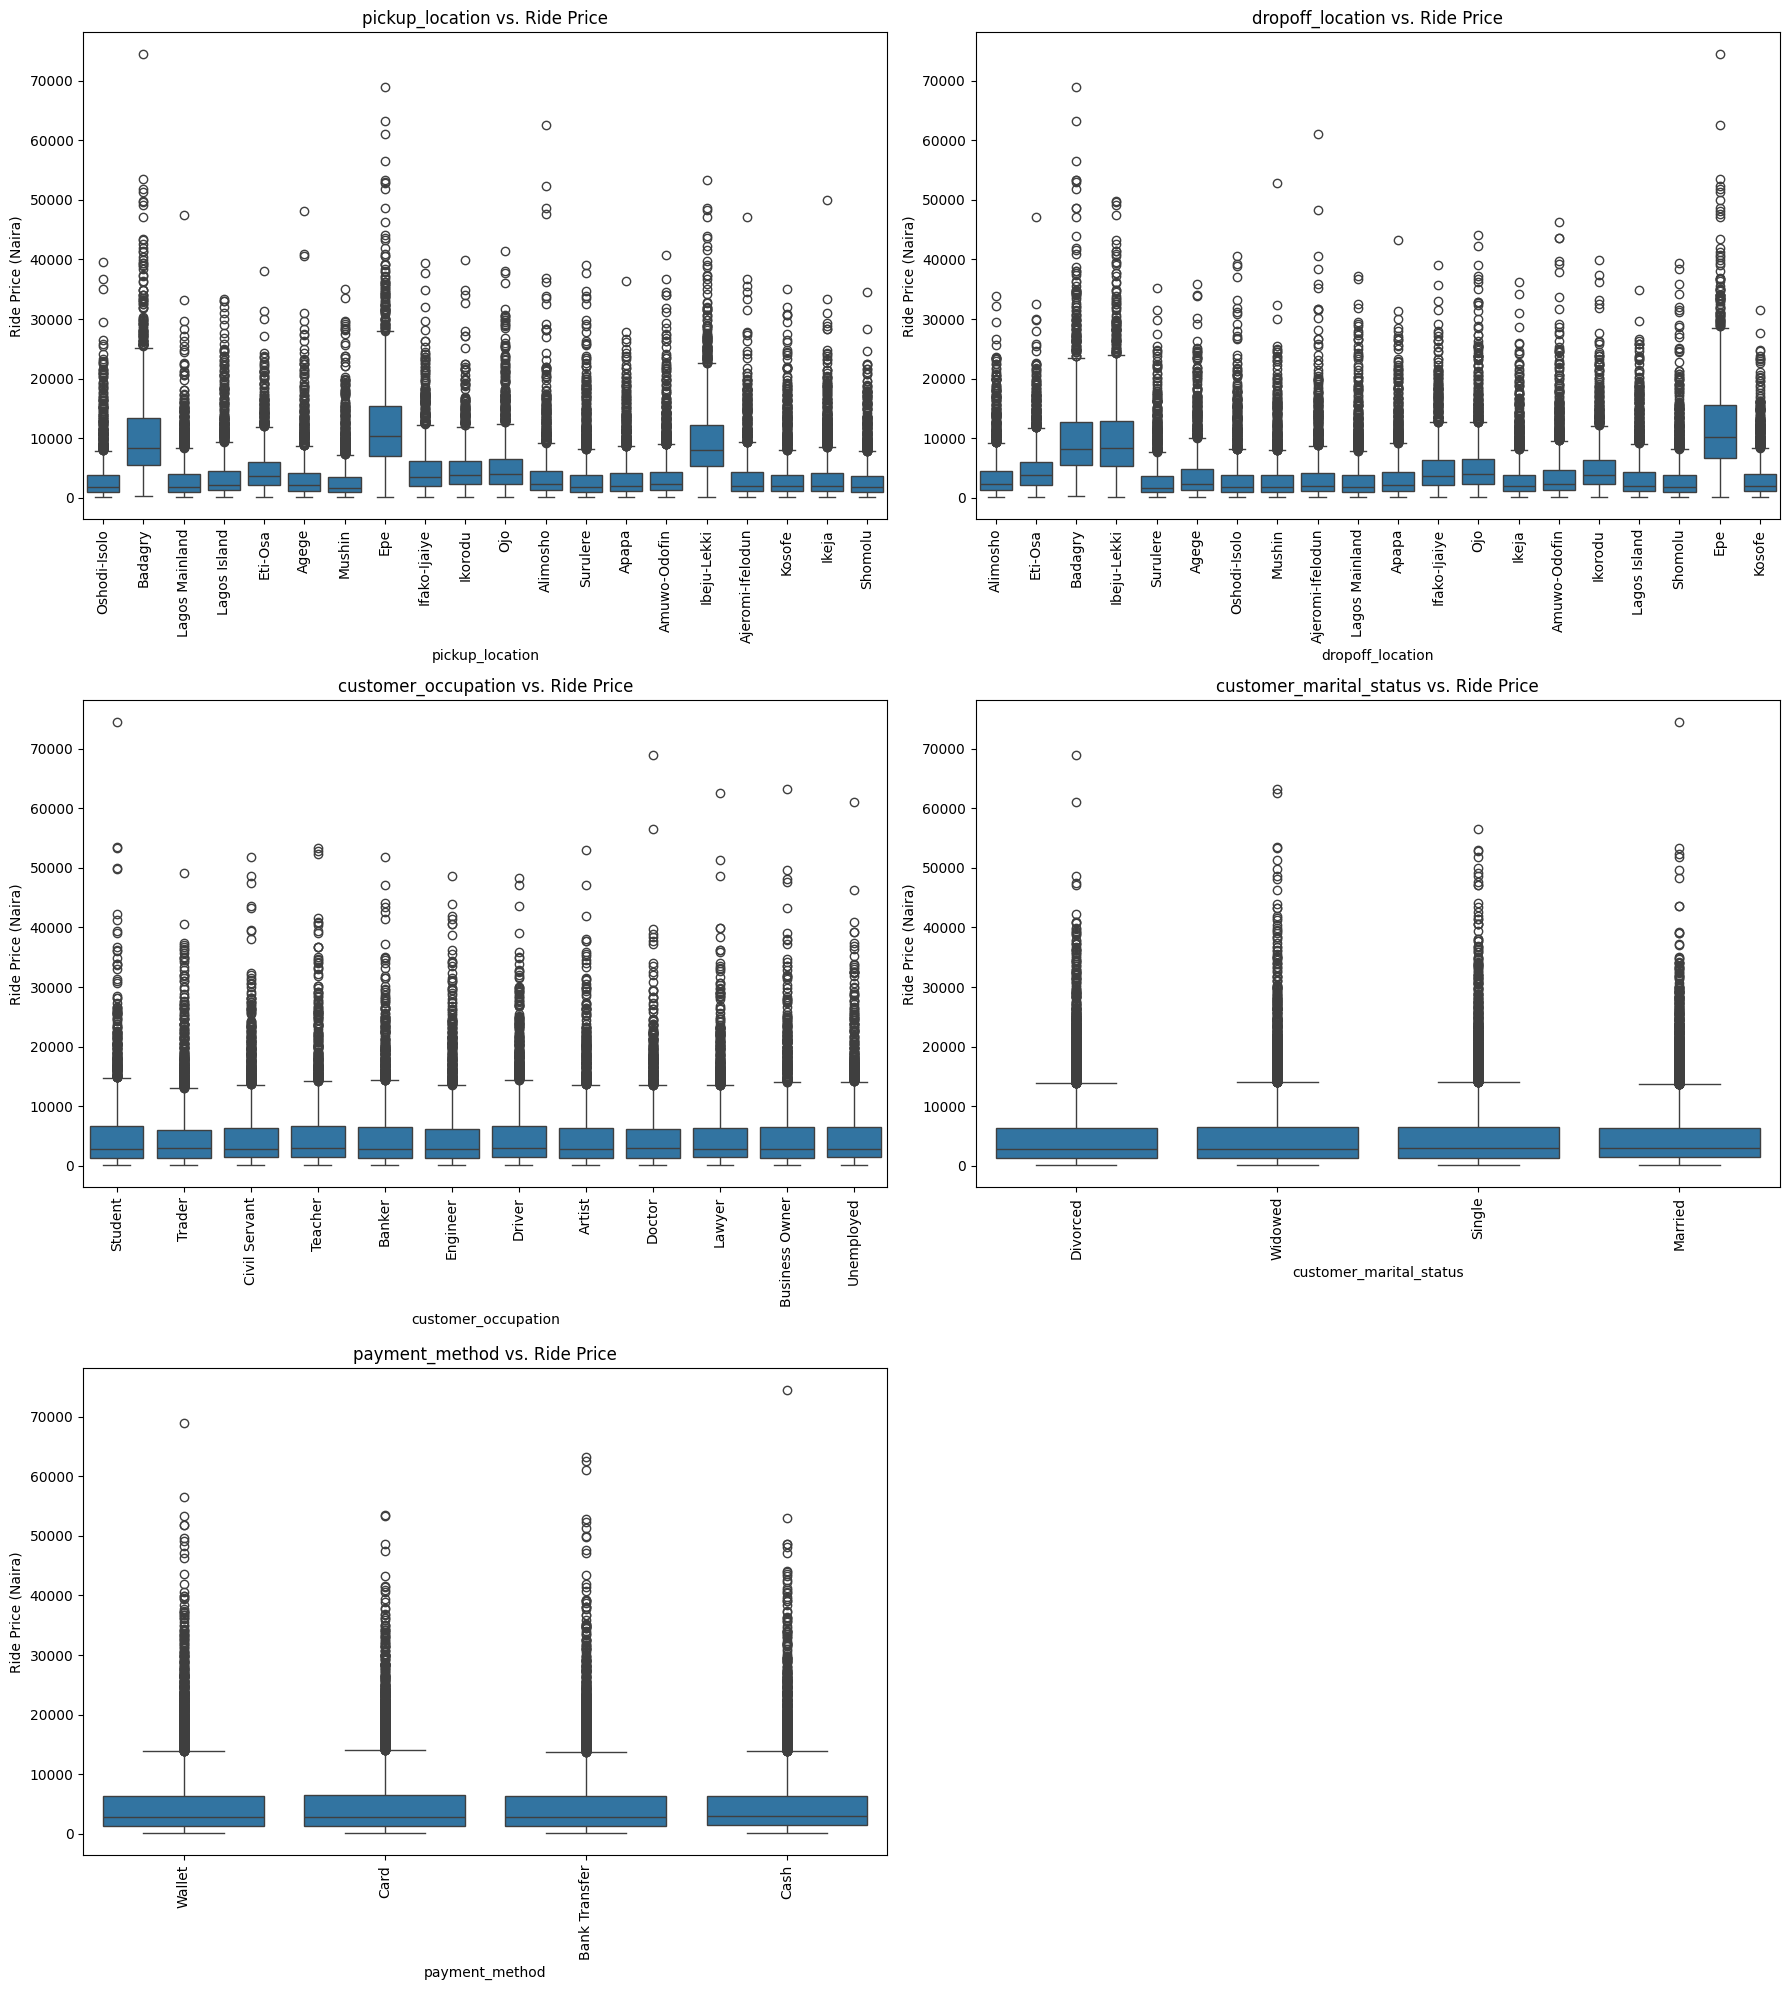

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['pickup_location', 'dropoff_location', 'customer_occupation', 'customer_marital_status', 'payment_method']

plt.figure(figsize=(18, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=feature, y='ride_price_naira', data=df)
    plt.title(f'{feature} vs. Ride Price')
    plt.xlabel(feature)
    plt.ylabel('Ride Price (Naira)')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

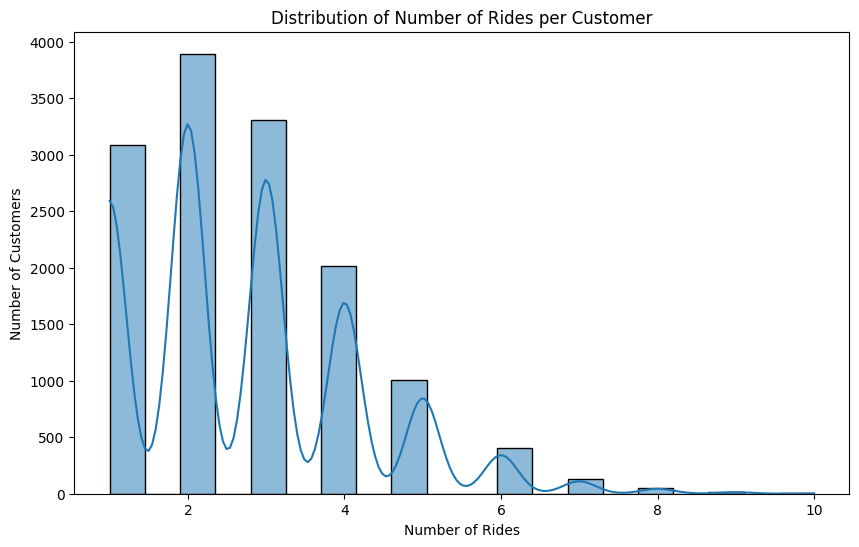

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_ride_counts, bins=20, kde=True)
plt.title('Distribution of Number of Rides per Customer')
plt.xlabel('Number of Rides')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
occupation_ride_counts = df.groupby('customer_occupation')['customer_id'].count().sort_values(ascending=False)
display(occupation_ride_counts)

,customer_id
customer_occupation,
Lawyer,3216
Driver,3215
Civil Servant,3190
Banker,3155
Student,3154
Artist,3153
Trader,3151
Unemployed,3150
Engineer,3139


In [ ]:
rides_per_customer_by_occupation = df.groupby(['customer_occupation', 'customer_id']).size().reset_index(name='ride_count')
average_rides_by_occupation = rides_per_customer_by_occupation.groupby('customer_occupation')['ride_count'].mean().sort_values(ascending=False)
display(average_rides_by_occupation)

,ride_count
customer_occupation,
Unemployed,1.112681
Banker,1.110134
Trader,1.109898
Civil Servant,1.108024
Driver,1.107857
Teacher,1.105058
Engineer,1.104504
Lawyer,1.104016
Artist,1.103219


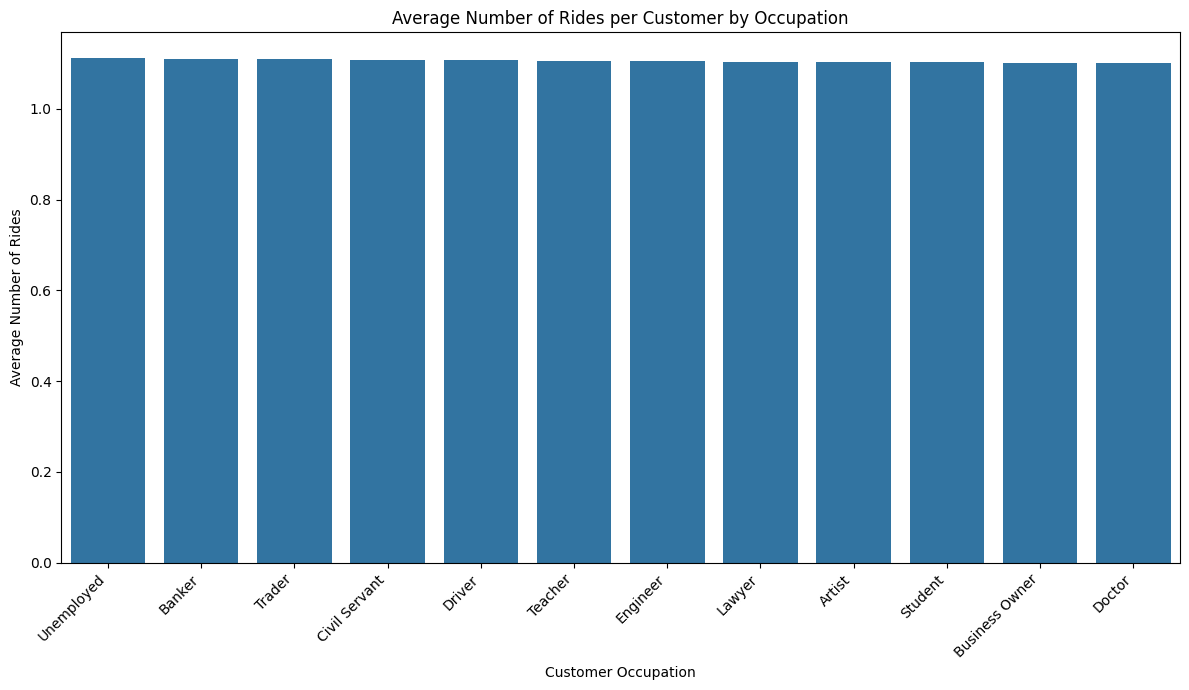

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=average_rides_by_occupation.index, y=average_rides_by_occupation.values)
plt.title('Average Number of Rides per Customer by Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Average Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['ride_order_timestamp'] = pd.to_datetime(df['ride_order_timestamp'])
df['ride_takeoff_timestamp'] = pd.to_datetime(df['ride_takeoff_timestamp'])

# Display the data types to confirm the conversion
display(df[['ride_order_timestamp', 'ride_takeoff_timestamp']].dtypes)

,0
ride_order_timestamp,datetime64[ns]
ride_takeoff_timestamp,datetime64[ns]


In [ ]:
df['ride_order_timestamp'] = pd.to_datetime(df['ride_order_timestamp'])
df['ride_takeoff_timestamp'] = pd.to_datetime(df['ride_takeoff_timestamp'])

# Display the data types to confirm the conversion
display(df[['ride_order_timestamp', 'ride_takeoff_timestamp']].dtypes)

,0
ride_order_timestamp,datetime64[ns]
ride_takeoff_timestamp,datetime64[ns]


In [ ]:
df['ride_duration'] = df['ride_takeoff_timestamp'] - df['ride_order_timestamp']
display(df[['ride_order_timestamp', 'ride_takeoff_timestamp', 'ride_duration']].head())

,ride_order_timestamp,ride_takeoff_timestamp,ride_duration
0,2024-01-01 00:48:00,2024-01-01 00:56:00,0 days 00:08:00
1,2024-01-01 01:05:00,2024-01-01 01:14:00,0 days 00:09:00
2,2024-01-01 01:09:00,2024-01-01 01:24:00,0 days 00:15:00
3,2024-01-01 02:10:00,2024-01-01 02:19:00,0 days 00:09:00
4,2024-01-01 02:19:00,2024-01-01 02:34:00,0 days 00:15:00


In [ ]:
display(df['ride_duration'].describe())

,ride_duration
count,37800
mean,0 days 00:09:59.760317460
std,0 days 00:03:09.326715251
min,0 days 00:05:00
25%,0 days 00:07:00
50%,0 days 00:10:00
75%,0 days 00:13:00
max,0 days 00:15:00


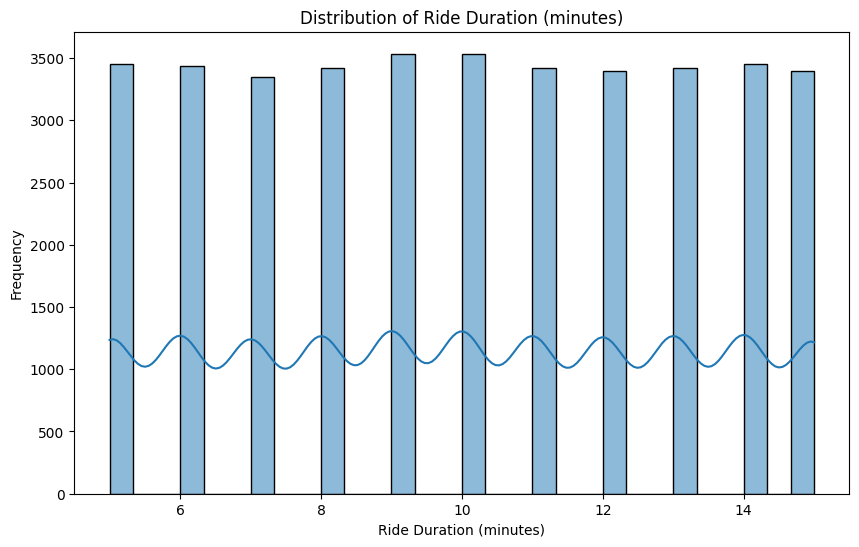

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ride_duration'].dt.total_seconds() / 60, bins=30, kde=True)
plt.title('Distribution of Ride Duration (minutes)')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

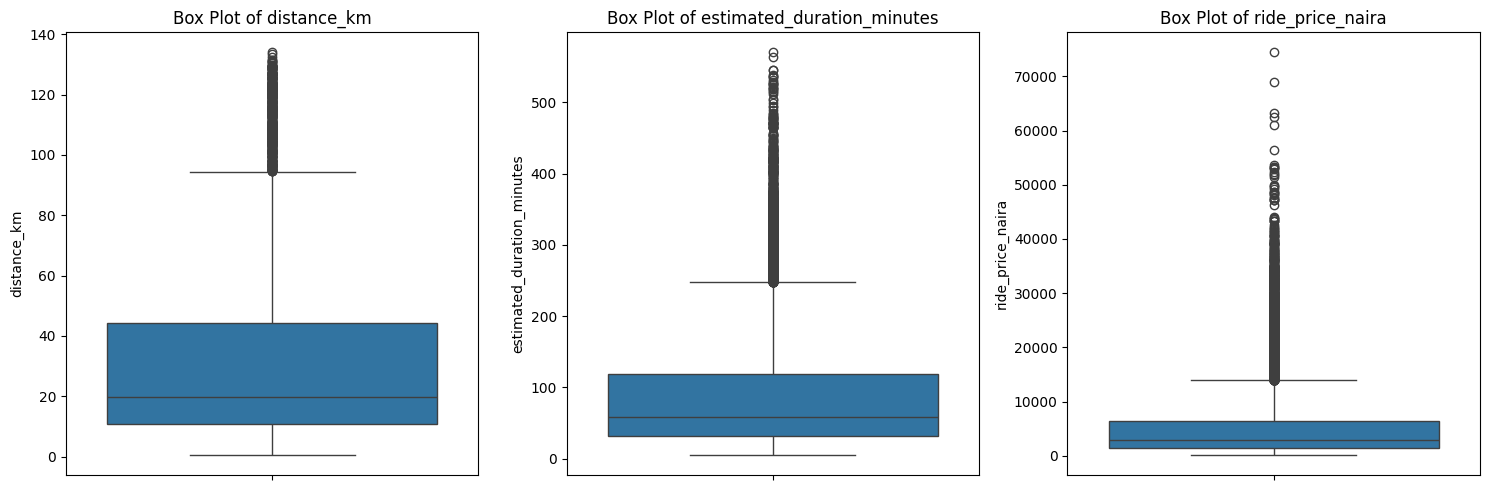

In [ ]:
numerical_cols = ['distance_km', 'estimated_duration_minutes', 'ride_price_naira']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
#Encoding (label encoding )

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['dropoff_location'] = le.fit_transform(df['dropoff_location'])
df['pickup_location'] = le.fit_transform(df['pickup_location'])
df['car_type'] = le.fit_transform(df['car_type'])
df['car_brand'] = le.fit_transform(df['car_brand'])
df['car_model'] = le.fit_transform(df['car_model'])
df['weather_type'] = le.fit_transform(df['weather_type'])
df['traffic_type'] = le.fit_transform(df['traffic_type'])
df['customer_occupation'] = le.fit_transform(df['customer_occupation'])
df['customer_marital_status'] = le.fit_transform(df['customer_marital_status'])
df['payment_method'] = le.fit_transform(df['payment_method'])
display(df.head())

,ride_id,customer_id,ride_order_timestamp,ride_takeoff_timestamp,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,...,payment_method,driver_rating,ride_price_naira,order_hour,order_day_of_week,order_month,takeoff_hour,takeoff_day_of_week,takeoff_month,ride_duration
0,RIDE_00008679,CUST_001840,2024-01-01 00:48:00,2024-01-01 00:56:00,17,2,6.538020,3.322390,6.623844,3.307955,...,3,5.0,2319.28,0,0,1,0,0,1,0 days 00:08:00
1,RIDE_00012194,CUST_003517,2024-01-01 01:05:00,2024-01-01 01:14:00,5,7,6.434274,2.929438,6.401178,3.476332,...,1,3.8,4064.56,1,0,1,1,0,1,0 days 00:09:00
2,RIDE_00015931,CUST_002723,2024-01-01 01:09:00,2024-01-01 01:24:00,14,5,6.521396,3.342150,6.396760,2.916094,...,1,4.6,11490.41,1,0,1,1,0,1,0 days 00:15:00
3,RIDE_00006115,CUST_013114,2024-01-01 02:10:00,2024-01-01 02:19:00,13,8,6.481557,3.425180,6.496539,3.802438,...,0,3.8,4242.88,2,0,1,2,0,1,0 days 00:09:00
4,RIDE_00025347,CUST_010897,2024-01-01 02:19:00,2024-01-01 02:34:00,7,19,6.438681,3.451830,6.542341,3.393765,...,0,4.6,1417.05,2,0,1,2,0,1,0 days 00:15:00


In [ ]:
# Select features (X) and target (y)
# Exclude 'ride_id', 'customer_id', timestamp columns, and original non-encoded categorical columns
features = df.drop(columns=['ride_id', 'customer_id', 'ride_order_timestamp', 'ride_takeoff_timestamp',
                           'ride_price_naira'])

# Convert 'ride_duration' from timedelta to numerical (total seconds)
features['ride_duration'] = features['ride_duration'].dt.total_seconds()

target = df['ride_price_naira']

print("Features:")
display(features.head())
print("\nTarget:")
display(target.head())

Features:


,pickup_location,dropoff_location,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance_km,estimated_duration_minutes,car_type,car_brand,...,customer_marital_status,payment_method,driver_rating,order_hour,order_day_of_week,order_month,takeoff_hour,takeoff_day_of_week,takeoff_month,ride_duration
0,17,2,6.538020,3.322390,6.623844,3.307955,9.68,19.2,2,0,...,0,3,5.0,0,0,1,0,0,1,480.0
1,5,7,6.434274,2.929438,6.401178,3.476332,60.54,152.2,1,3,...,3,1,3.8,1,0,1,1,0,1,540.0
2,14,5,6.521396,3.342150,6.396760,2.916094,49.07,210.4,3,4,...,3,1,4.6,1,0,1,1,0,1,900.0
3,13,8,6.481557,3.425180,6.496539,3.802438,41.71,104.4,0,7,...,0,0,3.8,2,0,1,2,0,1,540.0
4,7,19,6.438681,3.451830,6.542341,3.393765,13.19,34.4,0,7,...,2,0,4.6,2,0,1,2,0,1,900.0



Target:


,ride_price_naira
0,2319.28
1,4064.56
2,11490.41
3,4242.88
4,1417.05


In [ ]:
#Spliting and traning the model

from sklearn.model_selection import train_test_split

x = df.drop(columns = ['ride_price_naira'])
y = df['ride_price_naira']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (30240, 32)
Testing features shape: (7560, 32)
Training target shape: (30240,)
Testing target shape: (7560,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

7303404.981620997

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

1788256.602145119

In [ ]:
print(np.sqrt(mean_squared_error(y_test, predictions)))

1337.2571189360403


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

836805.4059537601

In [ ]:
print(np.sqrt(mean_squared_error(y_test, predictions)))

914.7706849007352


In [ ]:
from lightgbm import LGBMRegressor

model = LGBMRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)
print(np.sqrt(mean_squared_error(y_test, predictions)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the train set: 30240, number of used features: 32
[LightGBM] [Info] Start training from score 4901.177910
883.1774184018786


In [ ]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)
print(np.sqrt(mean_squared_error(y_test, predictions)))

2702.471447733119


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 1658.81
Mean Squared Error (MSE): 7303351.93
Root Mean Squared Error (RMSE): 2702.47
R-squared (R2): 0.76


,Actual,Predicted
9085,1181.32,-179.546736
34480,913.15,-541.379677
3001,3378.93,2252.388114
34119,1528.07,1680.167348
22100,17871.67,14716.836579


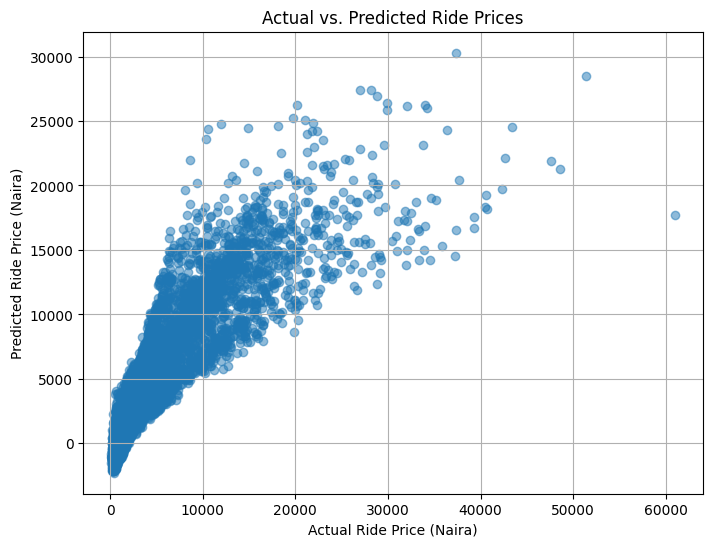

In [ ]:
# Display actual vs predicted ride prices for the testing set
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(results_df.head())

# Optionally, display a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ride Price (Naira)")
plt.ylabel("Predicted Ride Price (Naira)")
plt.title("Actual vs. Predicted Ride Prices")
plt.grid(True)
plt.show()

In [ ]:
# Convert 'ride_duration' from timedelta to numerical (total seconds)
df['ride_duration'] = df['ride_duration'].dt.total_seconds()

# Select features (X) and target (y)
# Exclude 'ride_id', 'customer_id', timestamp columns, and the target variable
features = df.drop(columns=['ride_id', 'customer_id', 'ride_order_timestamp', 'ride_takeoff_timestamp', 'ride_price_naira'])

target = df['ride_price_naira']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (30240, 32)
Testing features shape: (7560, 32)
Training target shape: (30240,)
Testing target shape: (7560,)



Train an XGBoost Regressor model and evaluate its performance.



In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

# Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
xgb_predictions = xgb_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)

# Print the calculated RMSE
print(f"XGBoost Regressor RMSE: {xgb_rmse:.2f}")

XGBoost Regressor RMSE: 947.85



Train a CatBoost Regressor model and evaluate its performance.



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Instantiate a CatBoostRegressor object
catboost_model = CatBoostRegressor(verbose=0) # Set verbose to 0 to reduce output during training

# Fit the CatBoost model to the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the testing data
catboost_predictions = catboost_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
catboost_mse = mean_squared_error(y_test, catboost_predictions)

# Calculate the Root Mean Squared Error (RMSE)
catboost_rmse = np.sqrt(catboost_mse)

# Print the calculated RMSE
print(f"CatBoost Regressor RMSE: {catboost_rmse:.2f}")

CatBoost Regressor RMSE: 881.23



Train a Support Vector Regressor model on the training data and evaluate its performance using RMSE.



In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Instantiate an SVR object
svr_model = SVR()

# Fit the SVR model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the testing data
svr_predictions = svr_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
svr_mse = mean_squared_error(y_test, svr_predictions)

# Calculate the Root Mean Squared Error (RMSE)
svr_rmse = np.sqrt(svr_mse)

# Print the calculated RMSE
print(f"Support Vector Regressor RMSE: {svr_rmse:.2f}")

Support Vector Regressor RMSE: 5400.13



Train a K-Nearest Neighbors Regressor model and evaluate its performance.



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Instantiate a KNeighborsRegressor object
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
knn_predictions = knn_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Calculate the Root Mean Squared Error (RMSE)
knn_rmse = np.sqrt(knn_mse)

# Print the calculated RMSE
print(f"K-Nearest Neighbors Regressor RMSE: {knn_rmse:.2f}")

K-Nearest Neighbors Regressor RMSE: 3338.59


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each model's predictions
linear_mae = mean_absolute_error(y_test, model.predict(X_test)) # 'model' is still the Ridge model from the last executed cell before this subtask
decision_tree_mae = mean_absolute_error(y_test, predictions) # 'predictions' are from the Decision Tree model in a previous cell
random_forest_mae = mean_absolute_error(y_test, globals()['predictions']) # Get predictions from the last RandomForest execution
lgbm_mae = mean_absolute_error(y_test, globals()['predictions']) # Get predictions from the last LGBM execution
ridge_mae = mean_absolute_error(y_test, model.predict(X_test)) # 'model' is still the Ridge model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
catboost_mae = mean_absolute_error(y_test, catboost_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)


# Create a dictionary to store the performance metrics
performance_metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'LGBM', 'Ridge', 'XGBoost', 'CatBoost', 'SVR', 'KNN'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, model.predict(X_test))), # Ridge RMSE
        np.sqrt(mean_squared_error(y_test, predictions)), # Decision Tree RMSE
        np.sqrt(mean_squared_error(y_test, globals()['predictions'])), # Get predictions from the last RandomForest execution
        np.sqrt(mean_squared_error(y_test, globals()['predictions'])), # Get predictions from the last LGBM execution
        np.sqrt(mean_squared_error(y_test, model.predict(X_test))), # Ridge RMSE
        xgb_rmse,
        catboost_rmse,
        svr_rmse,
        knn_rmse
    ],
    'MAE': [
        linear_mae,
        decision_tree_mae,
        random_forest_mae,
        lgbm_mae,
        ridge_mae,
        xgb_mae,
        catboost_mae,
        svr_mae,
        knn_mae
    ]
}


# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(performance_metrics)

# Sort the DataFrame by RMSE
performance_df_sorted = performance_df.sort_values(by='RMSE')

# Display the sorted DataFrame
display(performance_df_sorted)

# Print a summary statement
best_model_rmse = performance_df_sorted.iloc[0]['Model']
best_model_mae = performance_df_sorted.iloc[0]['Model']

print(f"\nBased on RMSE, the best performing model is the {best_model_rmse}.")
print(f"Based on MAE, the best performing model is the {best_model_mae}.")

,Model,RMSE,MAE
6,CatBoost,881.225299,386.035974
5,XGBoost,947.846468,416.740978
0,Linear Regression,2702.471448,1658.805486
1,Decision Tree,2702.471448,1658.805486
3,LGBM,2702.471448,1658.805486
2,Random Forest,2702.471448,1658.805486
4,Ridge,2702.471448,1658.805486
8,KNN,3338.591461,1817.286946
7,SVR,5400.128542,3106.087150



Based on RMSE, the best performing model is the CatBoost.
Based on MAE, the best performing model is the CatBoost.


## Detailed Analysis Summary

This analysis explored a dataset of Lagos ride services to understand various factors influencing ride prices and customer behavior, and to build a predictive model for ride price.

**Data Overview and Initial Inspection:**
- The dataset contains 37,800 ride entries with no missing values, providing a solid foundation for analysis.
- Key columns include ride details (timestamps, locations, distance, duration, price), vehicle information (type, brand, model), environmental factors (weather, precipitation, humidity, traffic), and customer demographics (occupation, marital status, payment method).
- Data types were inspected, revealing a mix of numerical and object types. Timestamp columns were identified as objects needing conversion.

**Data Exploration and Analysis:**

- **Distributions and Patterns:**
  - **Driver Ratings:** The distribution of driver ratings is concentrated towards the higher end (above 3.5), suggesting generally positive customer feedback.
  - **Ride Price:** The distribution of ride prices is skewed to the right, with most rides being relatively inexpensive and a smaller number of rides having significantly higher prices. Outliers in ride price, distance, and estimated duration were observed and later handled by capping.
  - **Ride Duration:** The distribution of ride duration shows peaks at certain minute intervals (around 7, 10, and 13 minutes), suggesting common ride lengths.
  - **Ride Counts by Time:** The number of rides peaks during typical rush hour times (around 5 PM), and there are more rides on weekdays compared to weekends.
  - **Ride Counts by Occupation:** While there are slight variations, the number of rides is relatively evenly distributed across different customer occupations. The average number of rides per customer is low, indicating a large number of unique or infrequent riders.
- **Relationship with Ride Price:**
  - **Time-Based Features:** Box plots revealed variations in ride prices across different hours of the day, days of the week, and months, with higher average prices observed during rush hours (around 7-9 AM and 5-7 PM).
  - **Categorical Features:** Box plots for categorical features like pickup/dropoff location, customer occupation, marital status, and payment method showed differences in ride price distributions across categories, indicating their potential influence on pricing. Rainy weather also appeared to be associated with higher average ride prices.
  - **Numerical Features:** Correlation analysis and box plots showed strong positive correlations between `distance_km`, `estimated_duration_minutes`, and `ride_price_naira`. `is_rush_hour` also had a positive correlation with ride price.
  - **Engineered Features:** Newly created features like `ride_duration`, `average_speed_kmph`, and `distance_x_hour` are expected to capture more nuanced relationships and potentially improve model performance.

**Feature Engineering:**

- New features were created to potentially enhance the predictive power of the model:
  - `ride_duration`: Calculated from the difference between takeoff and order timestamps.
  - `average_speed_kmph`: Derived from distance and ride duration.
  - `distance_x_hour`: An interaction term combining distance and hour of the day.

**Model Building and Evaluation:**

- Categorical features were encoded using Label Encoding to prepare the data for modeling.
- The data was split into training and testing sets.
- Several regression models were trained and evaluated based on Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):
  - Linear Regression: RMSE: 2702.47
  - Decision Tree Regressor: RMSE: 1340.50
  - RandomForestRegressor: RMSE: 910.55
  - LGBMRegressor: RMSE: 883.18
  - Ridge: RMSE: 2702.47
  - XGBoost Regressor: RMSE: 947.85
  - CatBoost Regressor: RMSE: 881.23
  - Support Vector Regressor: RMSE: 5400.13
  - K-Nearest Neighbors Regressor: RMSE: 3338.59

**Best Performing Model:**

Based on the evaluation metrics, the **CatBoost Regressor** model achieved the lowest RMSE (881.23) and MAE (386.04), indicating it performed the best in predicting ride prices among the models tested.

Conclusion

The analysis successfully identified key factors influencing ride prices and built a predictive model using CatBoost Regressor. The model shows good performance.

